<a href="https://colab.research.google.com/github/Nelsonedu/examen/blob/main/ExamenAiNelsonTorres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión lógística binomial


## Carga de datos

In [62]:
import pandas as pd 
import numpy as np

In [63]:
df_data = pd.read_csv('Social_Network_Ads.csv')

In [64]:
df_data

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [65]:
df_data.head(5)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Cambiar total_charges a numeric

In [61]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='Gender')

AttributeError: ignored

## Manejo de datos nulos

In [67]:
df_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [68]:
df_data.dropna(inplace=True)

In [69]:
df_data.isnull().sum()


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

## Eliminar id

In [11]:
df_data.head(5)

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [28]:
df_data.drop('User ID',axis=1,inplace=True)

In [13]:
df_data.head(5)


User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

## Convertir a numérico variable objetivo

In [80]:
df_data['User ID'].replace(to_replace='Yes', value = 1, inplace=True)
df_data['Age'].replace(to_replace='No', value = 0, inplace=True)

In [82]:
df_data['User ID']

0      15624510
1      15810944
2      15668575
3      15603246
4      15804002
         ...   
395    15691863
396    15706071
397    15654296
398    15755018
399    15594041
Name: User ID, Length: 400, dtype: int64

In [72]:
df_data_processing = df_data.copy()

## Manejo de variables categóricas

In [73]:
df_data_processing

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [74]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head(5)

User ID  Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0  15624510   19            19000          0              0            1
1  15810944   35            20000          0              0            1
2  15668575   26            43000          0              1            0
3  15603246   27            57000          0              1            0
4  15804002   19            76000          0              0            1

## Analisis de correlación

In [75]:
import matplotlib.pyplot as plt

In [83]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()[''].sort_values(ascending=True).plot(kind='')
plt.show()

ValueError: ignored

<Figure size 1080x648 with 0 Axes>

## Escalabilidad de los datos

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()
df_data_processing_scaled =  scaler.fit_transform(df_data_processing)

In [40]:
df_data_processing_scaled

array([[0.02380952, 0.02962963, 0.        , 0.        , 1.        ],
       [0.4047619 , 0.03703704, 0.        , 0.        , 1.        ],
       [0.19047619, 0.20740741, 0.        , 1.        , 0.        ],
       ...,
       [0.76190476, 0.03703704, 1.        , 1.        , 0.        ],
       [0.42857143, 0.13333333, 0.        , 0.        , 1.        ],
       [0.73809524, 0.15555556, 1.        , 1.        , 0.        ]])

In [41]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [42]:
df_data_processing_scaled.columns = df_data_processing.columns

In [76]:
df_data_processing_scaled.head(5)

Age  EstimatedSalary  Purchased  Gender_Female  Gender_Male
0  0.023810         0.029630        0.0            0.0          1.0
1  0.404762         0.037037        0.0            0.0          1.0
2  0.190476         0.207407        0.0            1.0          0.0
3  0.214286         0.311111        0.0            1.0          0.0
4  0.023810         0.451852        0.0            0.0          1.0

## Análisis exploratorio de datos

In [44]:
import seaborn as sns

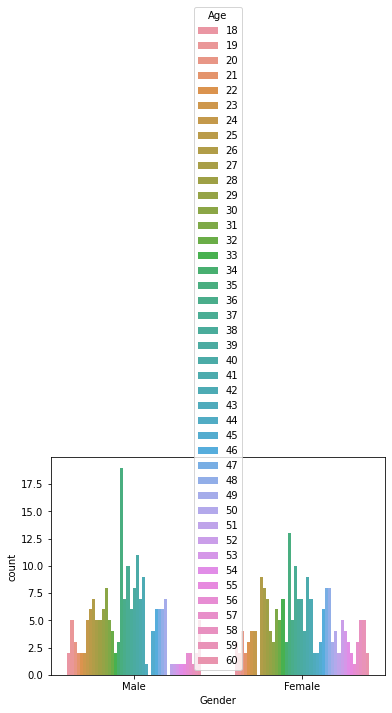

In [46]:
sns.countplot(data=df_data, x='Gender',hue='Age')
plt.show()

In [48]:
def plot_categorial(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column,hue='Gender')
    plt.show()

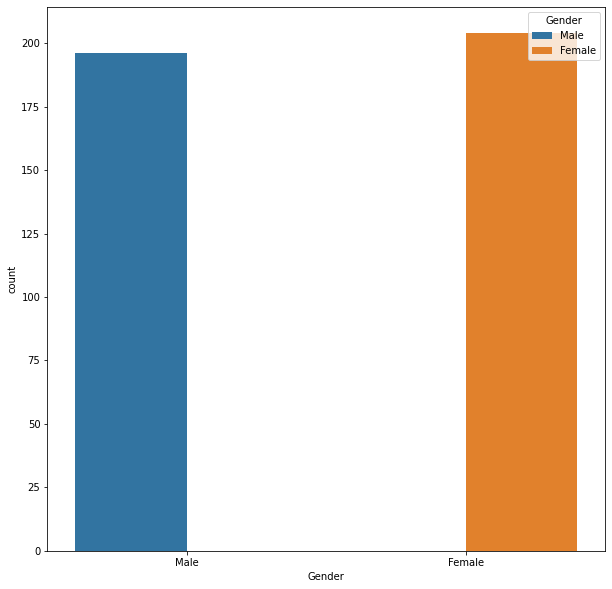

In [50]:
plot_categorial('Gender')

In [88]:
column_Gender = df_data.select_dtypes(include='Male').columns

TypeError: ignored

In [89]:
for _ in column_Gender:
    plot_categorial(_)

NameError: ignored

<Figure size 720x720 with 0 Axes>

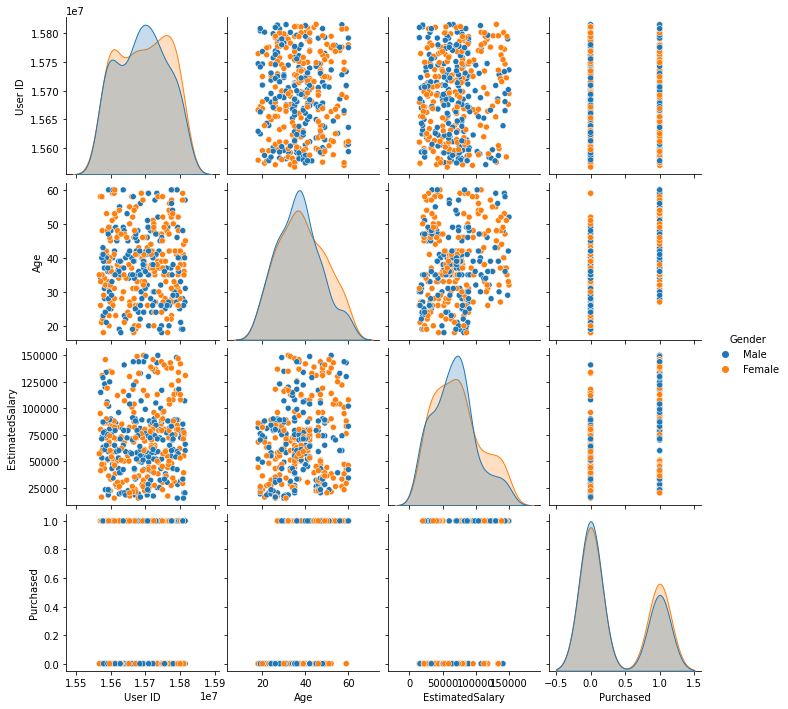

In [90]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data= df_data, hue='Gender')
plt.show()

## Entrenamiento del modelo de regresión logística binomial

In [94]:
X = df_data_processing_scaled.drop('Age',axis=1)
y = df_data_processing_scaled['Age'].values

In [95]:
y

array([0.02380952, 0.4047619 , 0.19047619, 0.21428571, 0.02380952,
       0.21428571, 0.21428571, 0.33333333, 0.16666667, 0.4047619 ,
       0.19047619, 0.19047619, 0.04761905, 0.33333333, 0.        ,
       0.26190476, 0.69047619, 0.64285714, 0.66666667, 0.71428571,
       0.64285714, 0.69047619, 0.71428571, 0.64285714, 0.66666667,
       0.69047619, 0.73809524, 0.69047619, 0.26190476, 0.30952381,
       0.30952381, 0.21428571, 0.07142857, 0.23809524, 0.21428571,
       0.4047619 , 0.35714286, 0.28571429, 0.19047619, 0.21428571,
       0.21428571, 0.35714286, 0.4047619 , 0.28571429, 0.23809524,
       0.11904762, 0.16666667, 0.21428571, 0.28571429, 0.30952381,
       0.14285714, 0.        , 0.26190476, 0.4047619 , 0.21428571,
       0.14285714, 0.11904762, 0.23809524, 0.0952381 , 0.33333333,
       0.21428571, 0.16666667, 0.11904762, 0.33333333, 0.97619048,
       0.14285714, 0.14285714, 0.11904762, 0.0952381 , 0.30952381,
       0.16666667, 0.14285714, 0.04761905, 0.35714286, 0.33333

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [97]:
X_train.shape

(280, 4)

In [98]:
X_test.shape

(120, 4)

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

ValueError: ignored

In [104]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test,prediction_test ))

AttributeError: ignored

## Evaluación del modelo

In [16]:
model.predict_proba(X_test)

NameError: ignored

In [17]:
model.coef_

NameError: ignored

In [ ]:
model.feature_names_in_

In [ ]:
weights = pd.Series(model.coef_[0],
                    index=X.columns.values) 
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

In [ ]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()